In [53]:
from mesh import Mesh
from dt_mesh_deformation import DT_Mesh_Deform
from dtrbf_mesh_deformation import DTRBF1_Mesh_Deform
from dtidw_mesh_deformation import DTIDW_Mesh_Deform
from dtad_mesh_deformation import DTAD_Mesh_Deform
from dtvote_mesh_deformation import DTV_Mesh_Deform
from dtrbfad_mesh_deformation import DTRBFAD_Mesh_Deform
import matplotlib
import numpy as np

In [54]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (20, 20)
matplotlib.rcParams['figure.dpi'] = 200

In [55]:
v = []
for i in range(-10,11):
  for j in range(-10,11):
    if not (i >= -1 and i <= 1 and j == 0):
      v.append([i,j])

f = []
for i in range(-10,10):
  for j in range(-10,10):
    if not (i >= -2 and i <= 1 and j >= -1 and j <= 0):      
      f.append([[i,j], [i+1,j], [i+1,j+1], [i,j+1]])


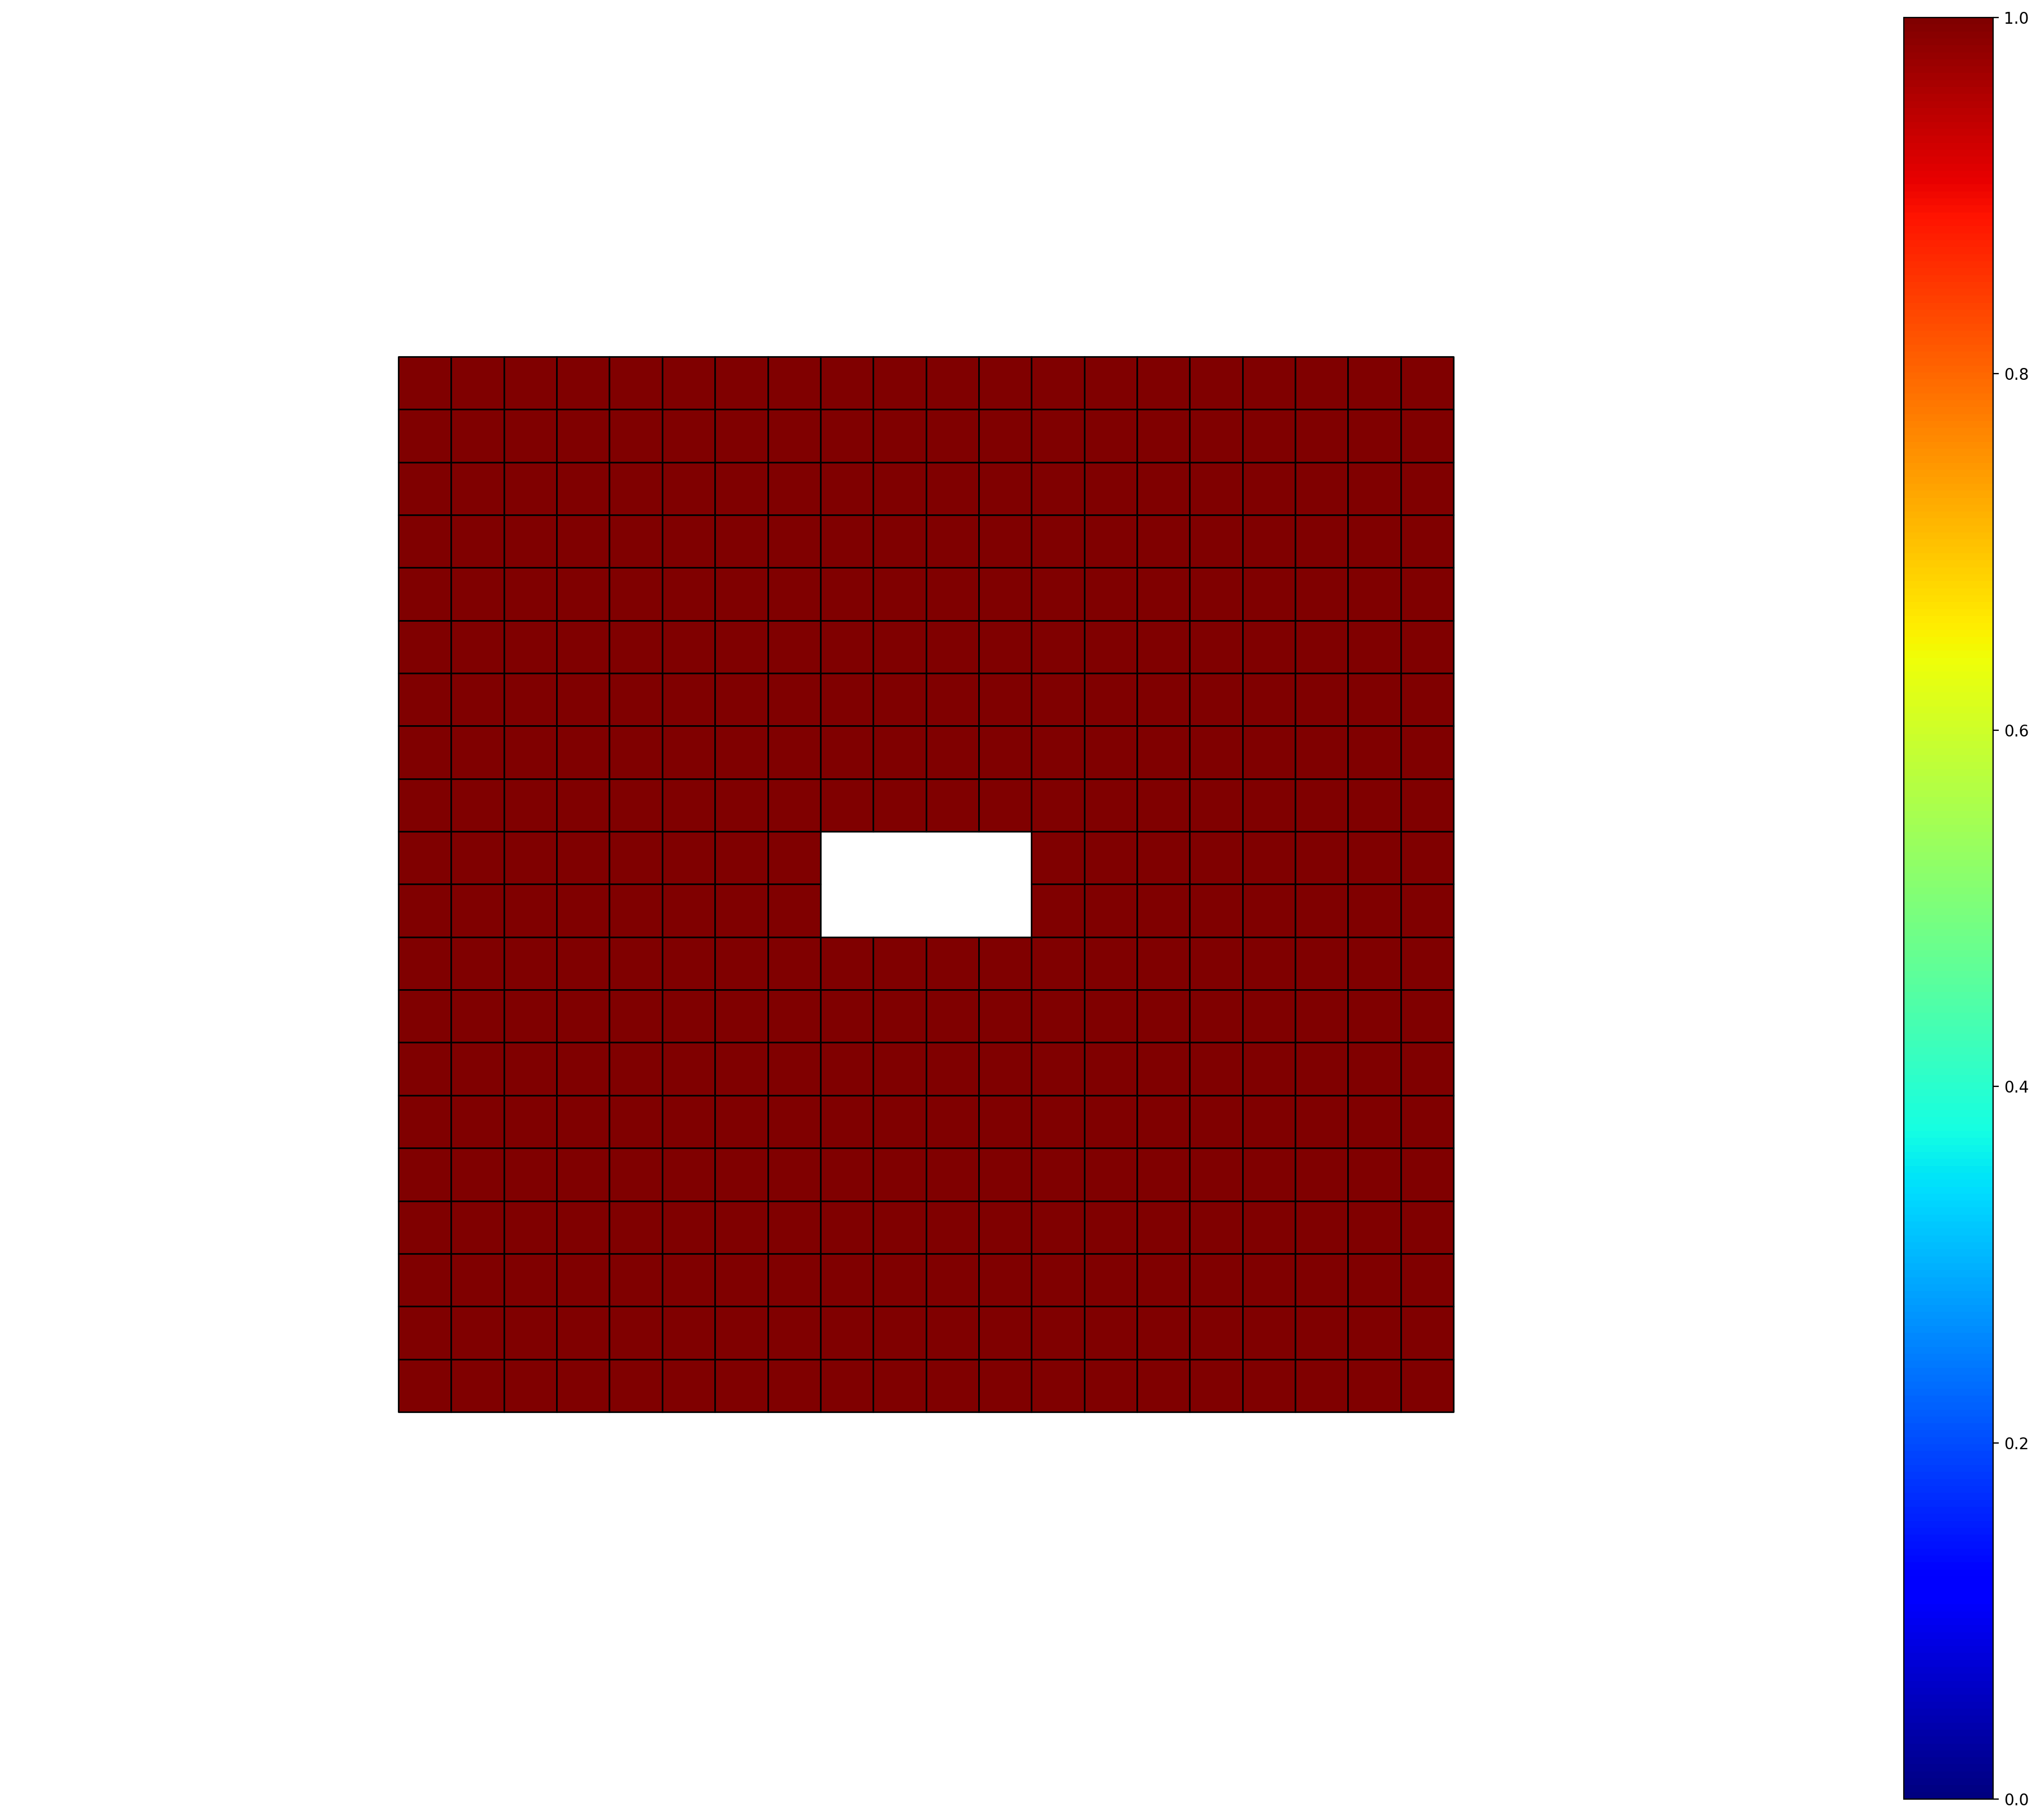

In [56]:
fi = Mesh.faces_points_to_index(v, f)
mesh = Mesh(v,fi,2)
mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)

In [57]:
exterior = []

for i in range(-10,11):
  exterior.append([-10,i])
  exterior.append([10,i])
for i in range(-9,10):
  exterior.append([i,-10])
  exterior.append([i,10])

for i in range(-2,3):
  exterior.append([i,-1])
  exterior.append([i,1])

exterior.append([-2,0])
exterior.append([2,0])

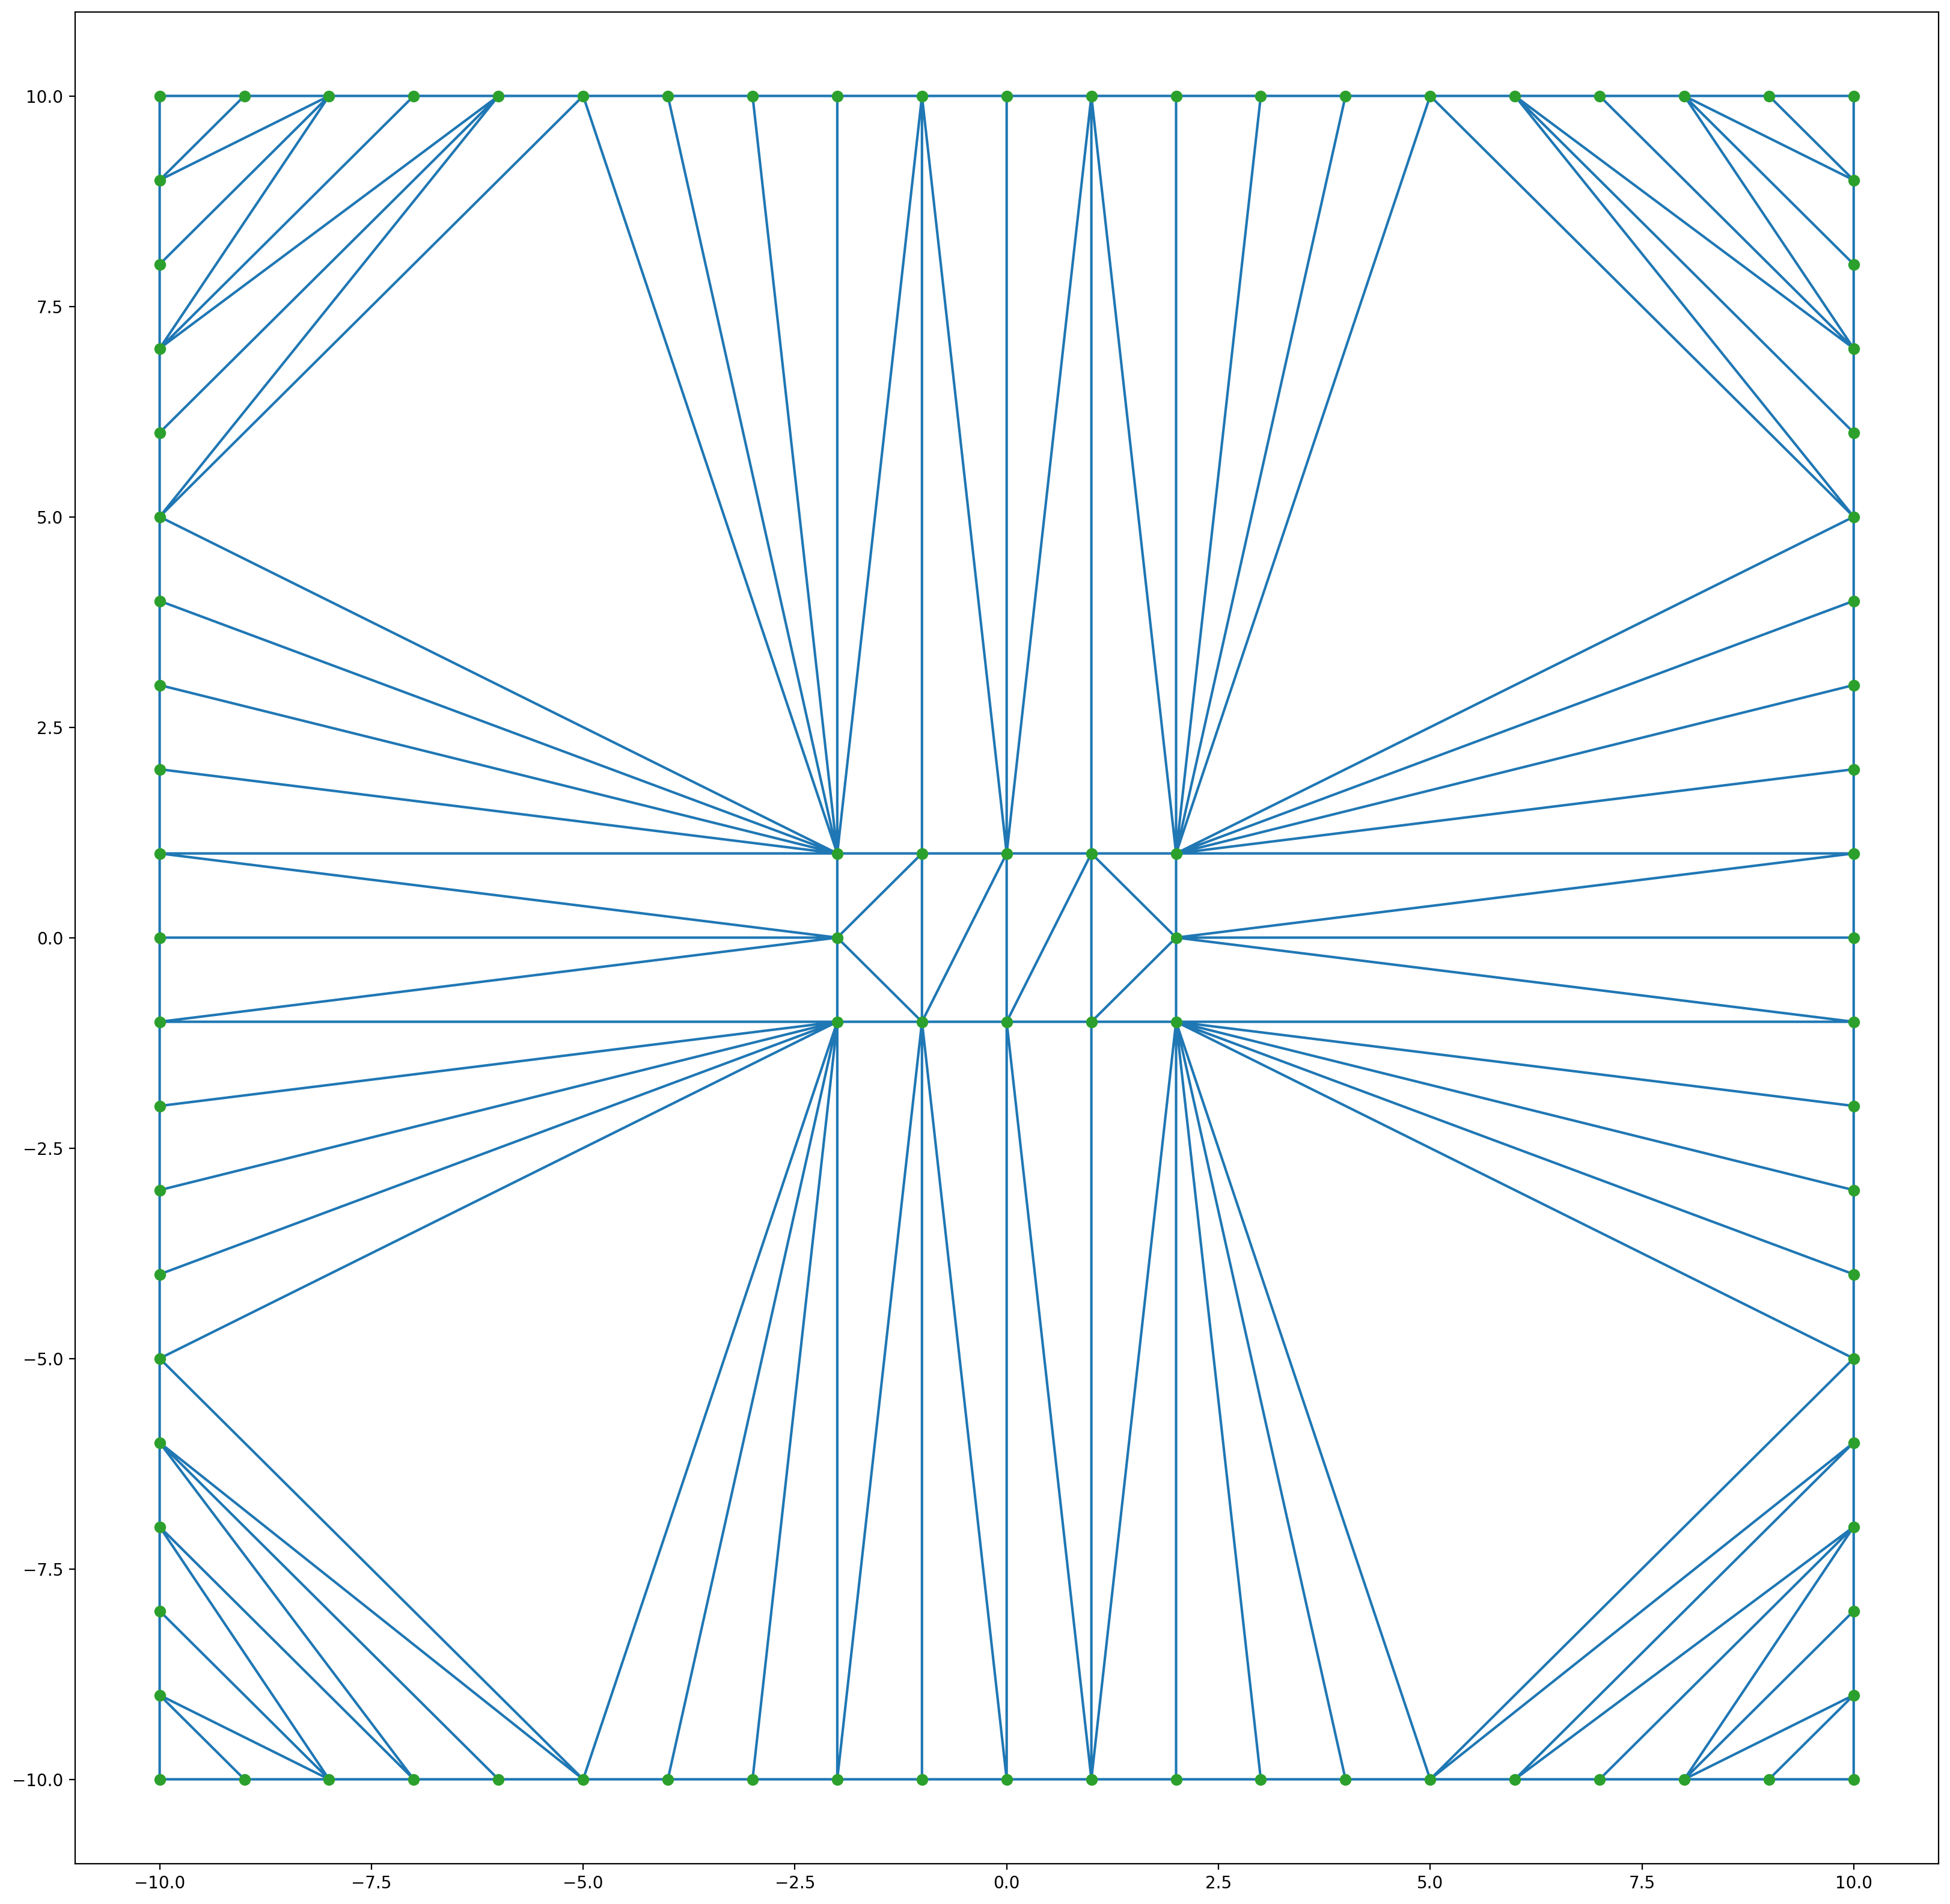

In [58]:
DT_Mesh_Deform.visualize_delaunay(exterior)

In [59]:
exterior_mapping = {}
rotation_mapping = {}

for p in exterior:
  x = p[0]
  y = p[1]
  theta = np.pi / 2
  rotate = np.array([
      [np.cos(theta), -np.sin(theta)],
      [np.sin(theta),  np.cos(theta)]
  ])

  if (x >= -5 and x <= 5 and y >= -5 and y <= 5):
    exterior_mapping[(x,y)] = tuple(np.dot(rotate, [x,y]))
    rotation_mapping[(x,y)] = -1 * theta
  else:
    exterior_mapping[(x,y)] = (x,y)
    rotation_mapping[(x,y)] = 0


/Users/aksharyeccherla/Documents/delaunay-mesh-deformation/mesh.py:80: RuntimeWarning: divide by zero encountered in scalar divide
  sum += (np.sqrt(tensor_k[0][0] * tensor_k[1][1]))/alpha_k


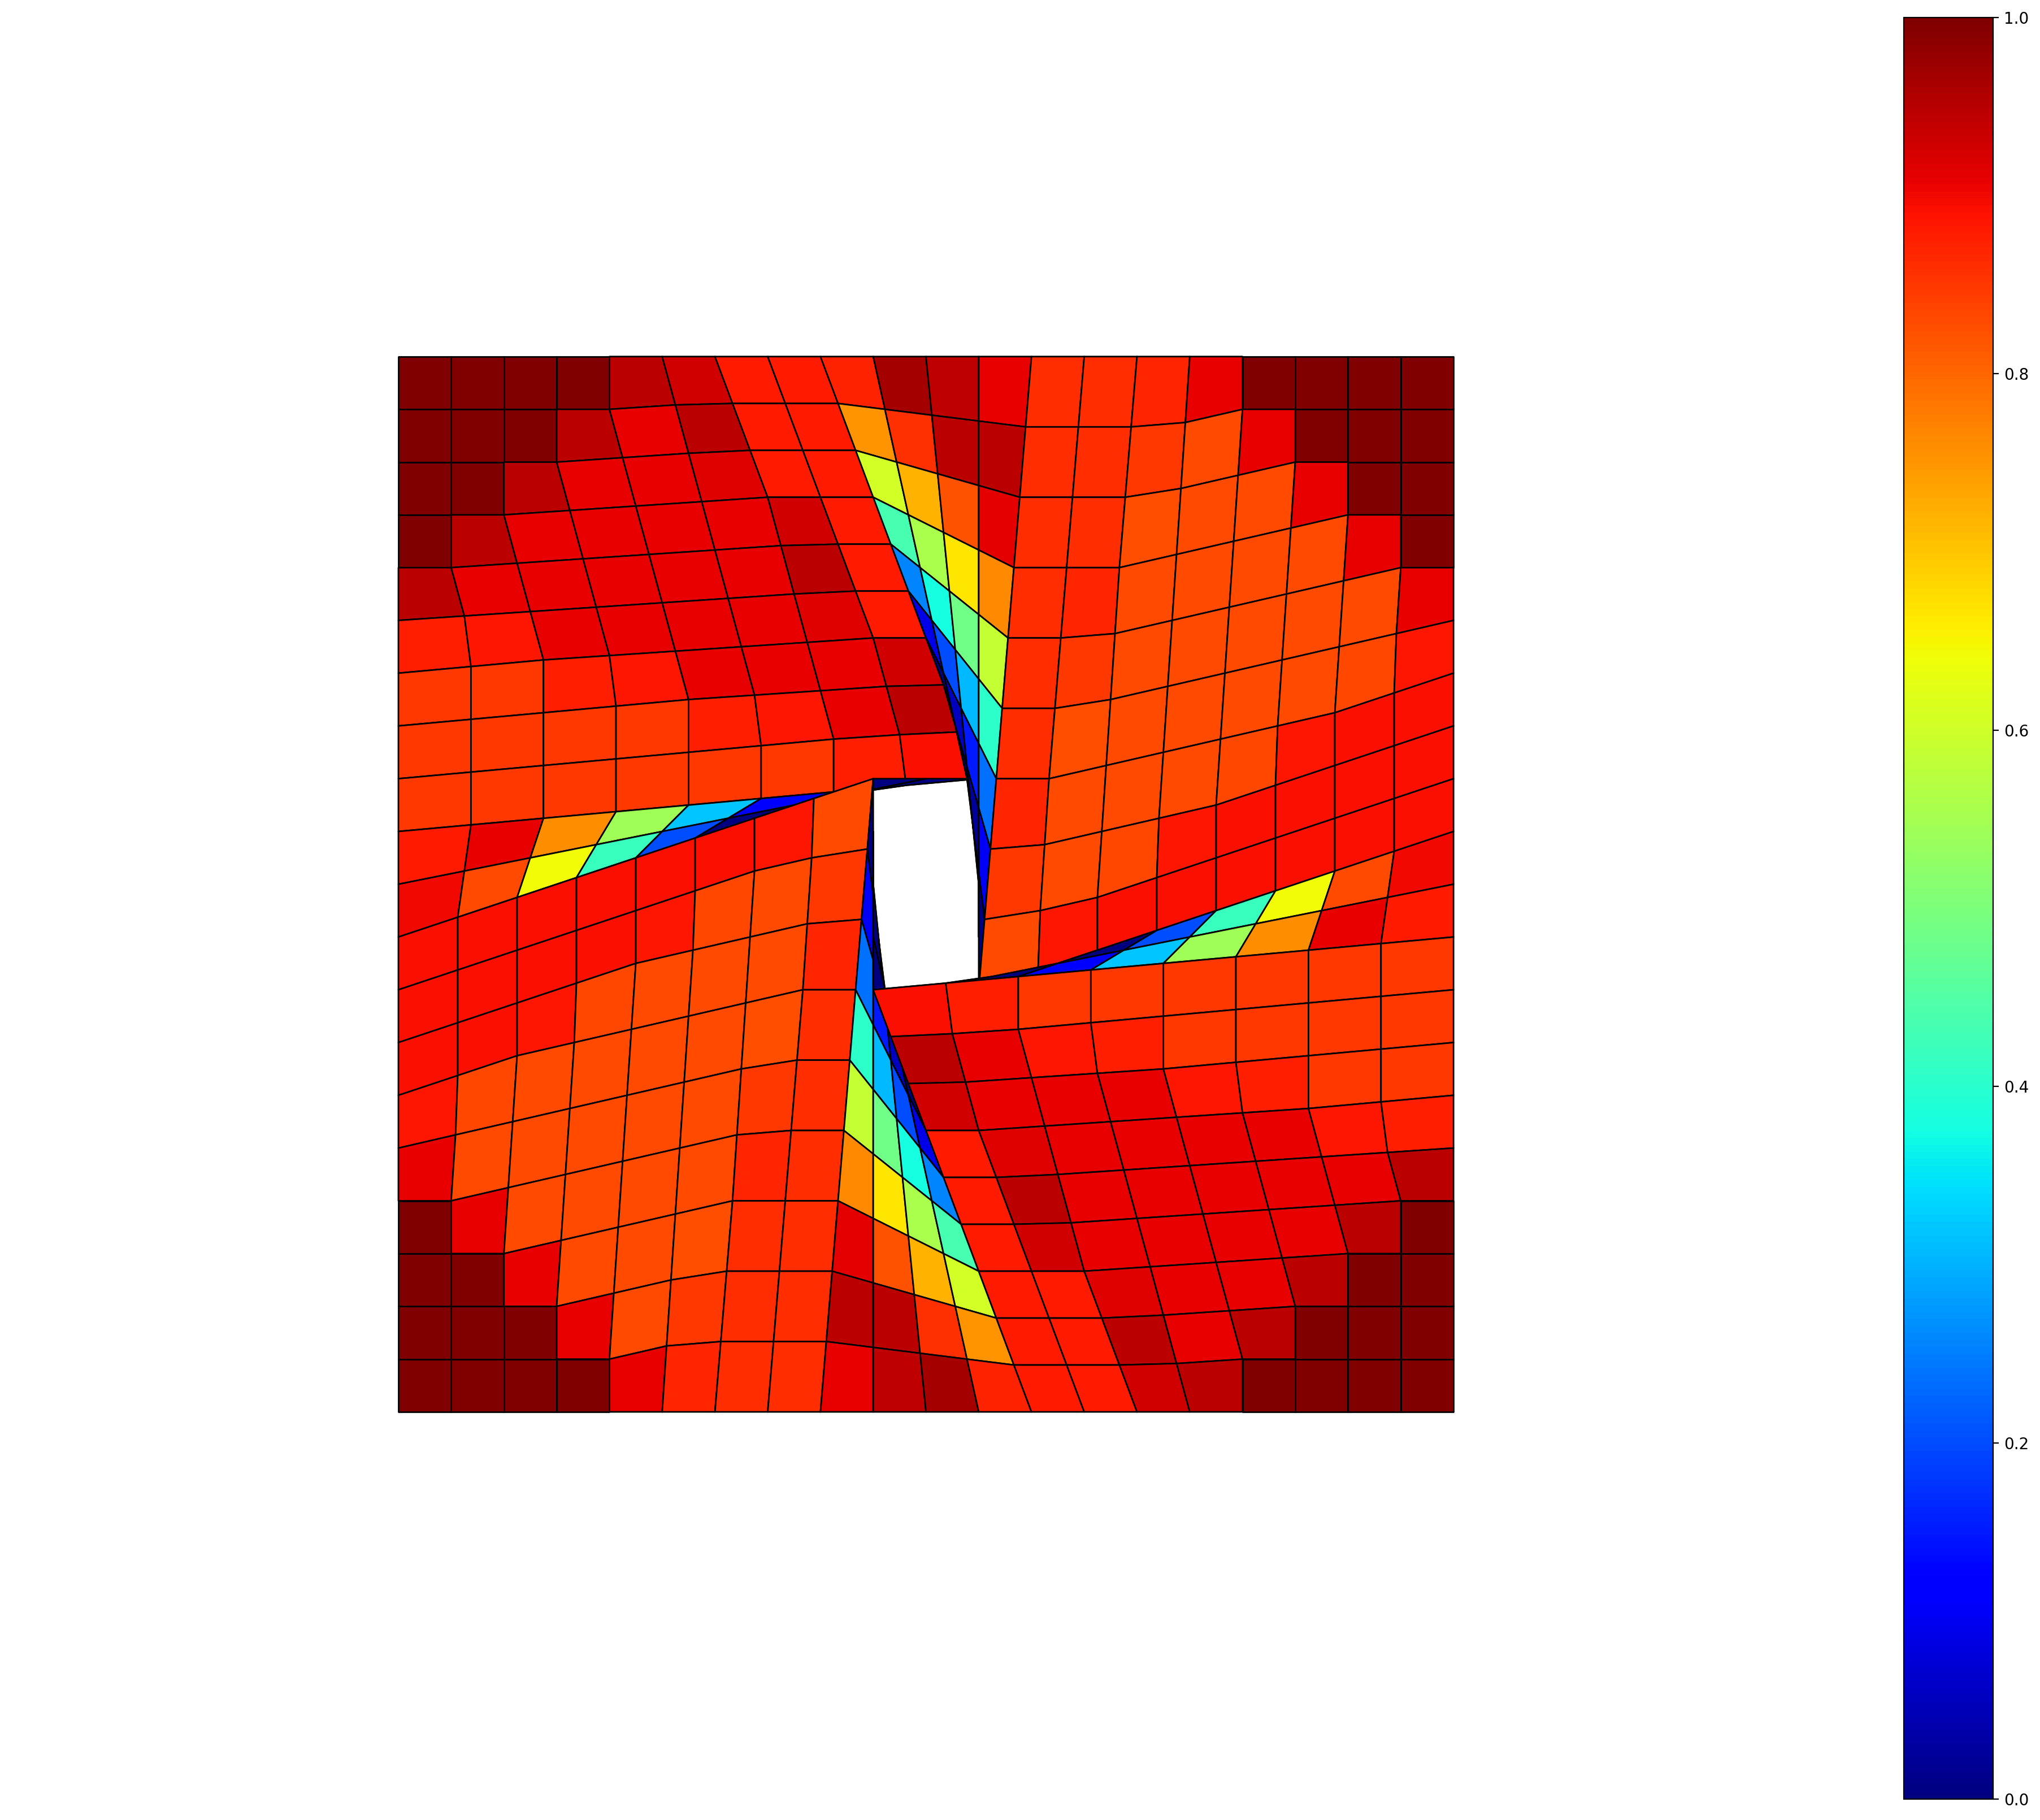

0
0.7721184189039391


In [60]:
new_mesh = DT_Mesh_Deform.deform(mesh, exterior, exterior_mapping)
new_mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)
print(min(new_mesh.qualities))
print(np.sum(new_mesh.qualities)/len(new_mesh.qualities))

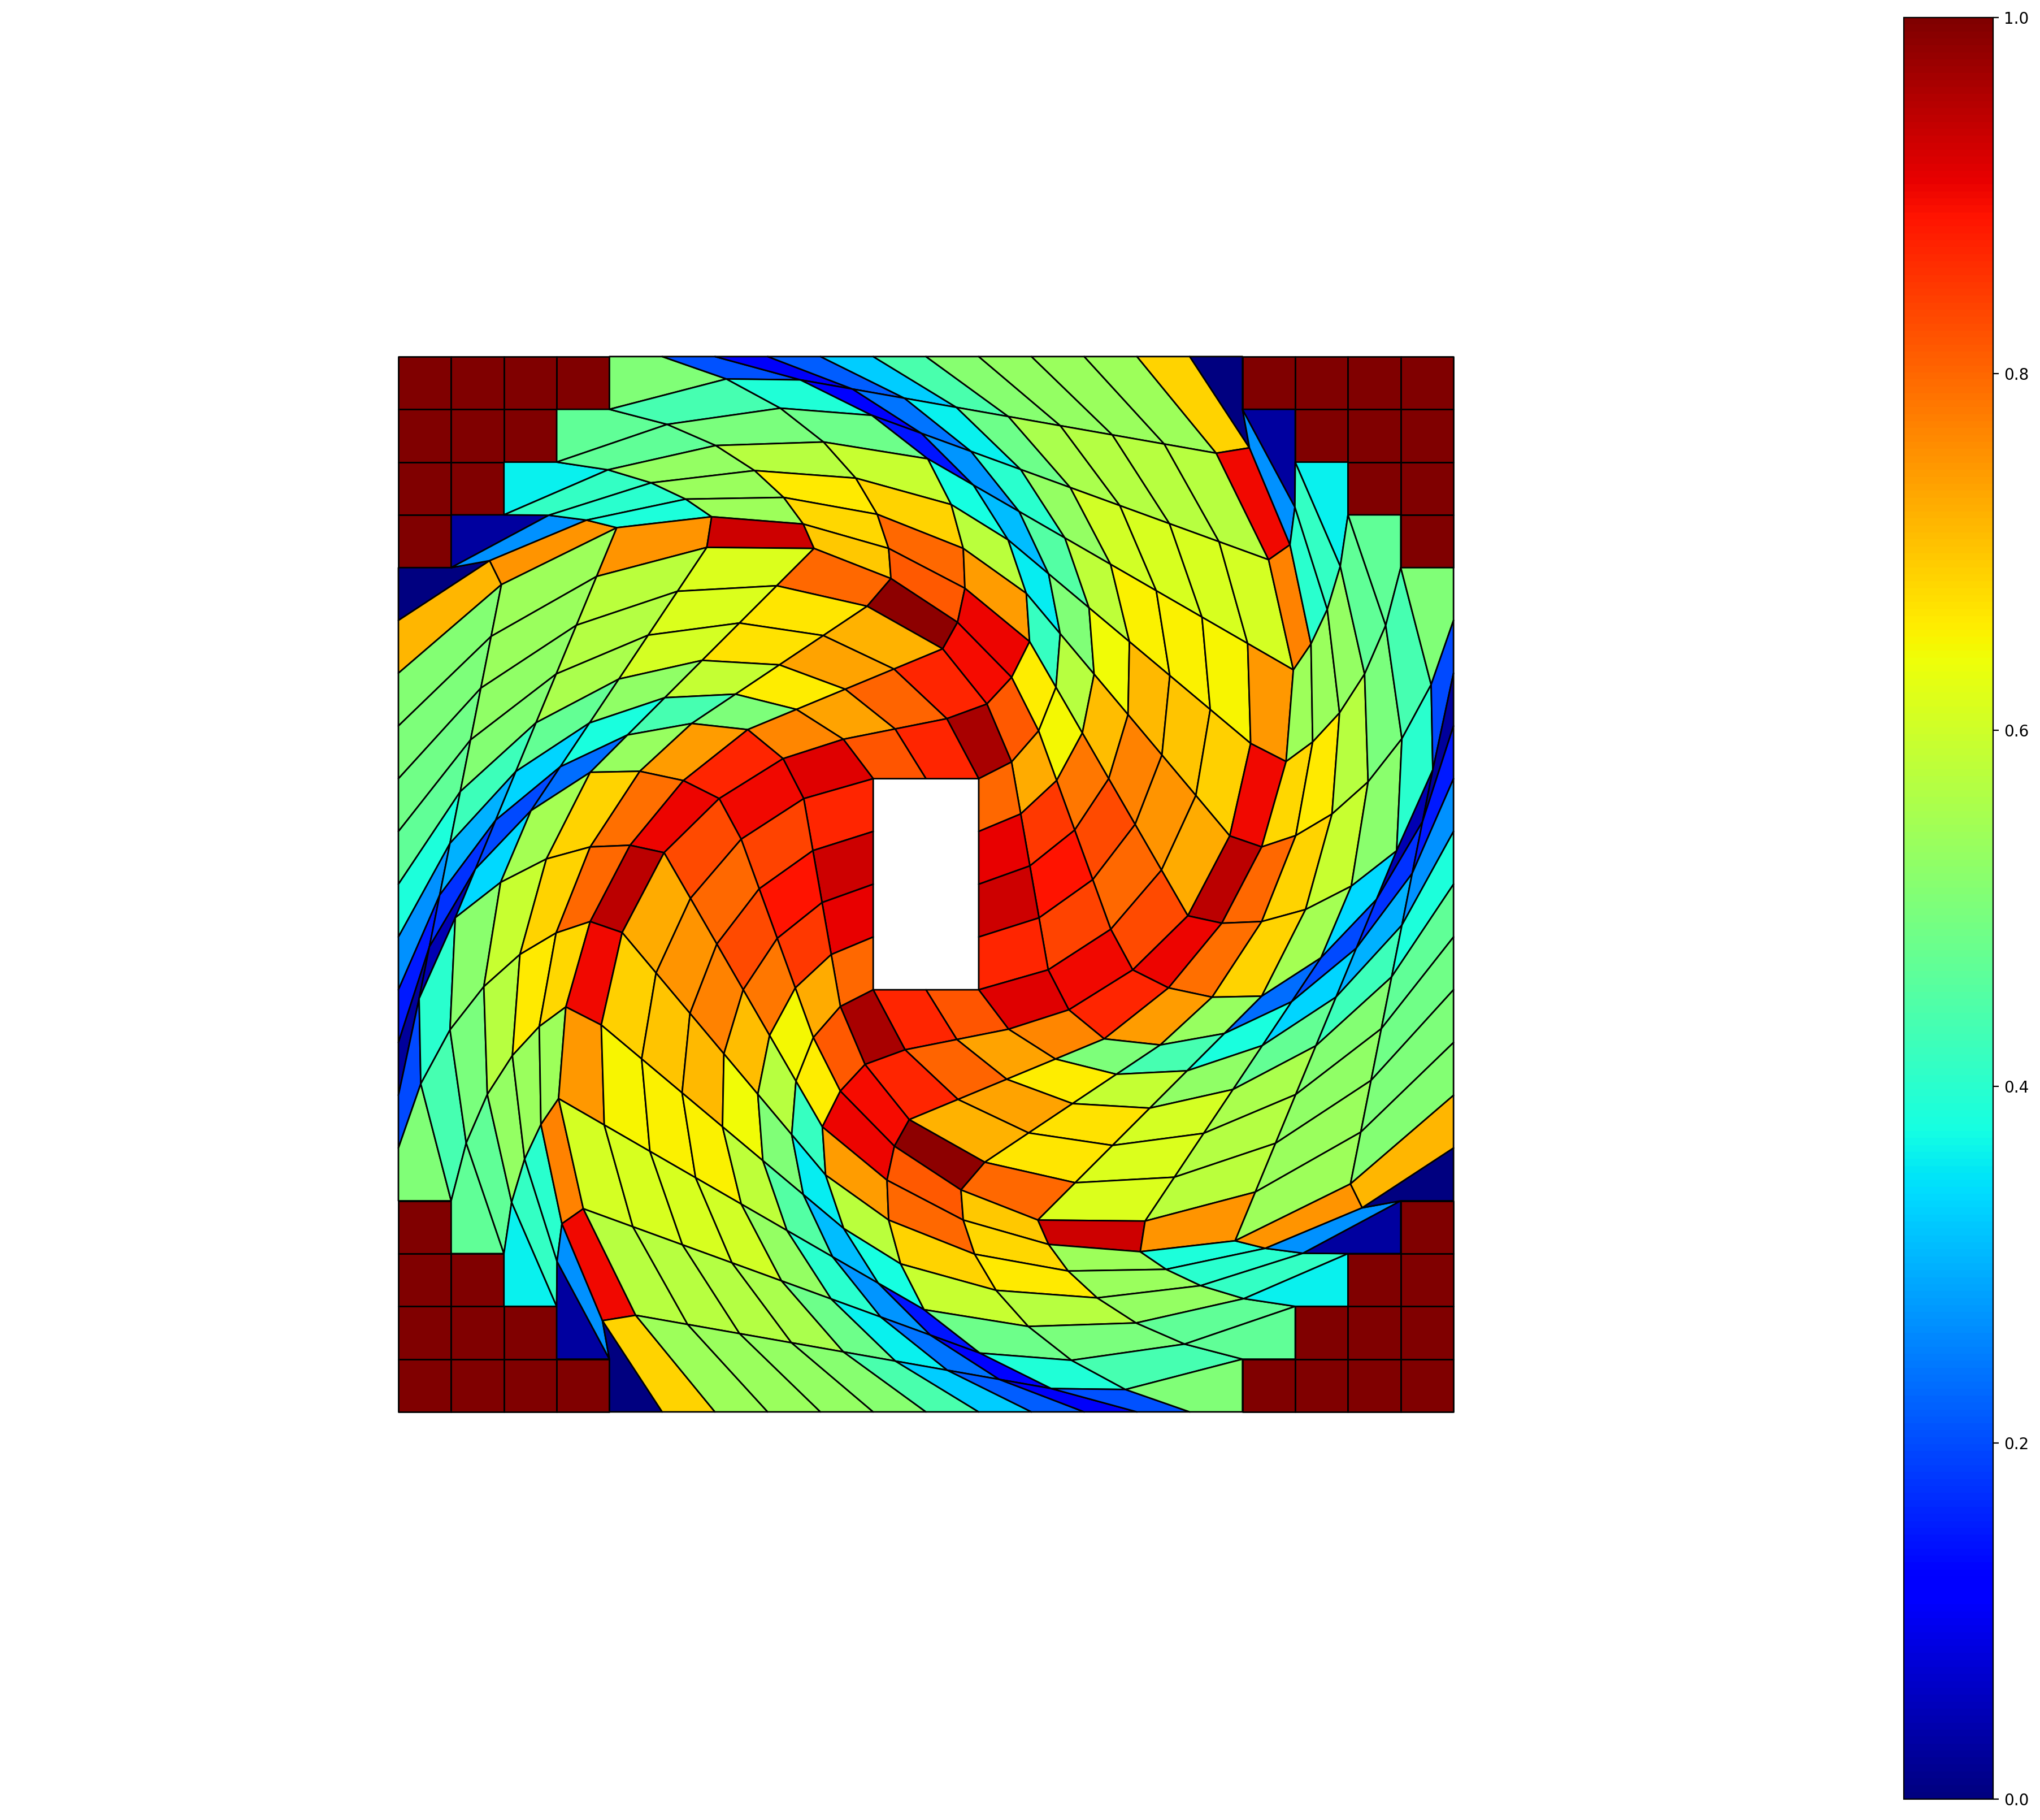

0
0.6095219010648593


In [61]:
new_mesh = DT_Mesh_Deform.deform_rotation(mesh, exterior, rotation_mapping)
new_mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)
print(min(new_mesh.qualities))
print(np.sum(new_mesh.qualities)/len(new_mesh.qualities))

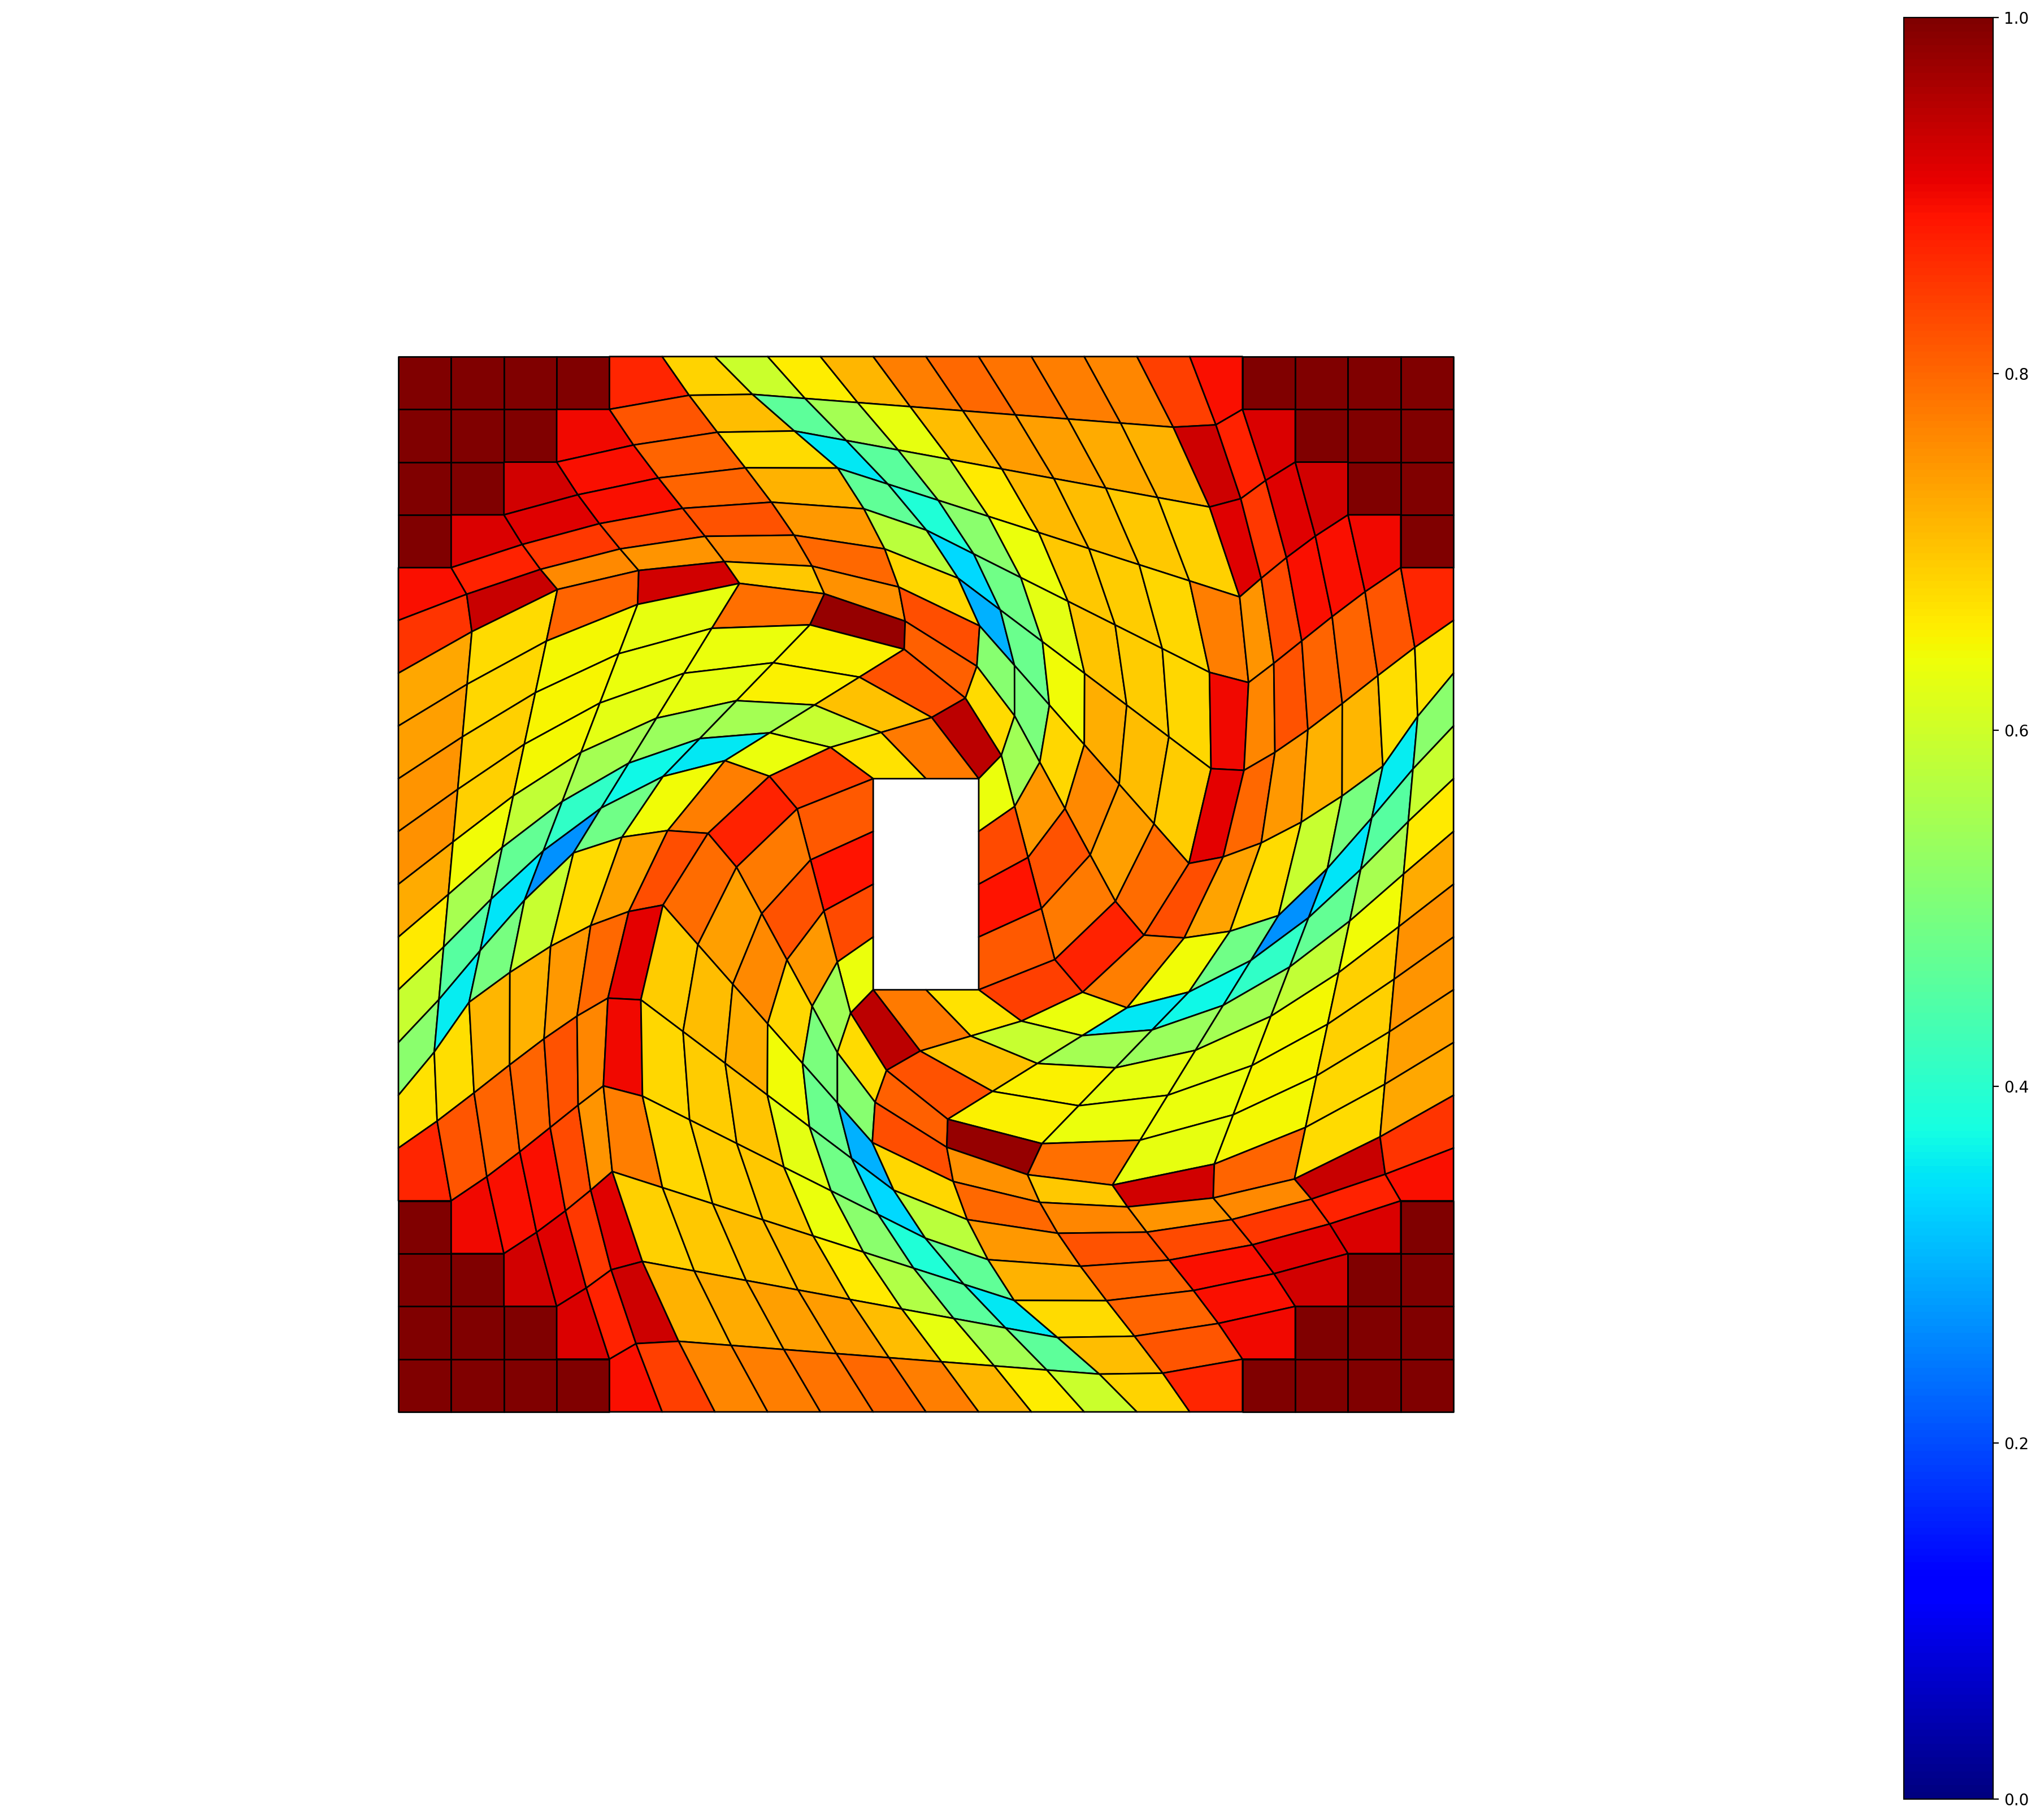

0.2659712738007375
0.7372015584572736


In [62]:
new_mesh = DTAD_Mesh_Deform.deform_rotation(mesh, exterior, rotation_mapping)
new_mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)
print(min(new_mesh.qualities))
print(np.sum(new_mesh.qualities)/len(new_mesh.qualities))

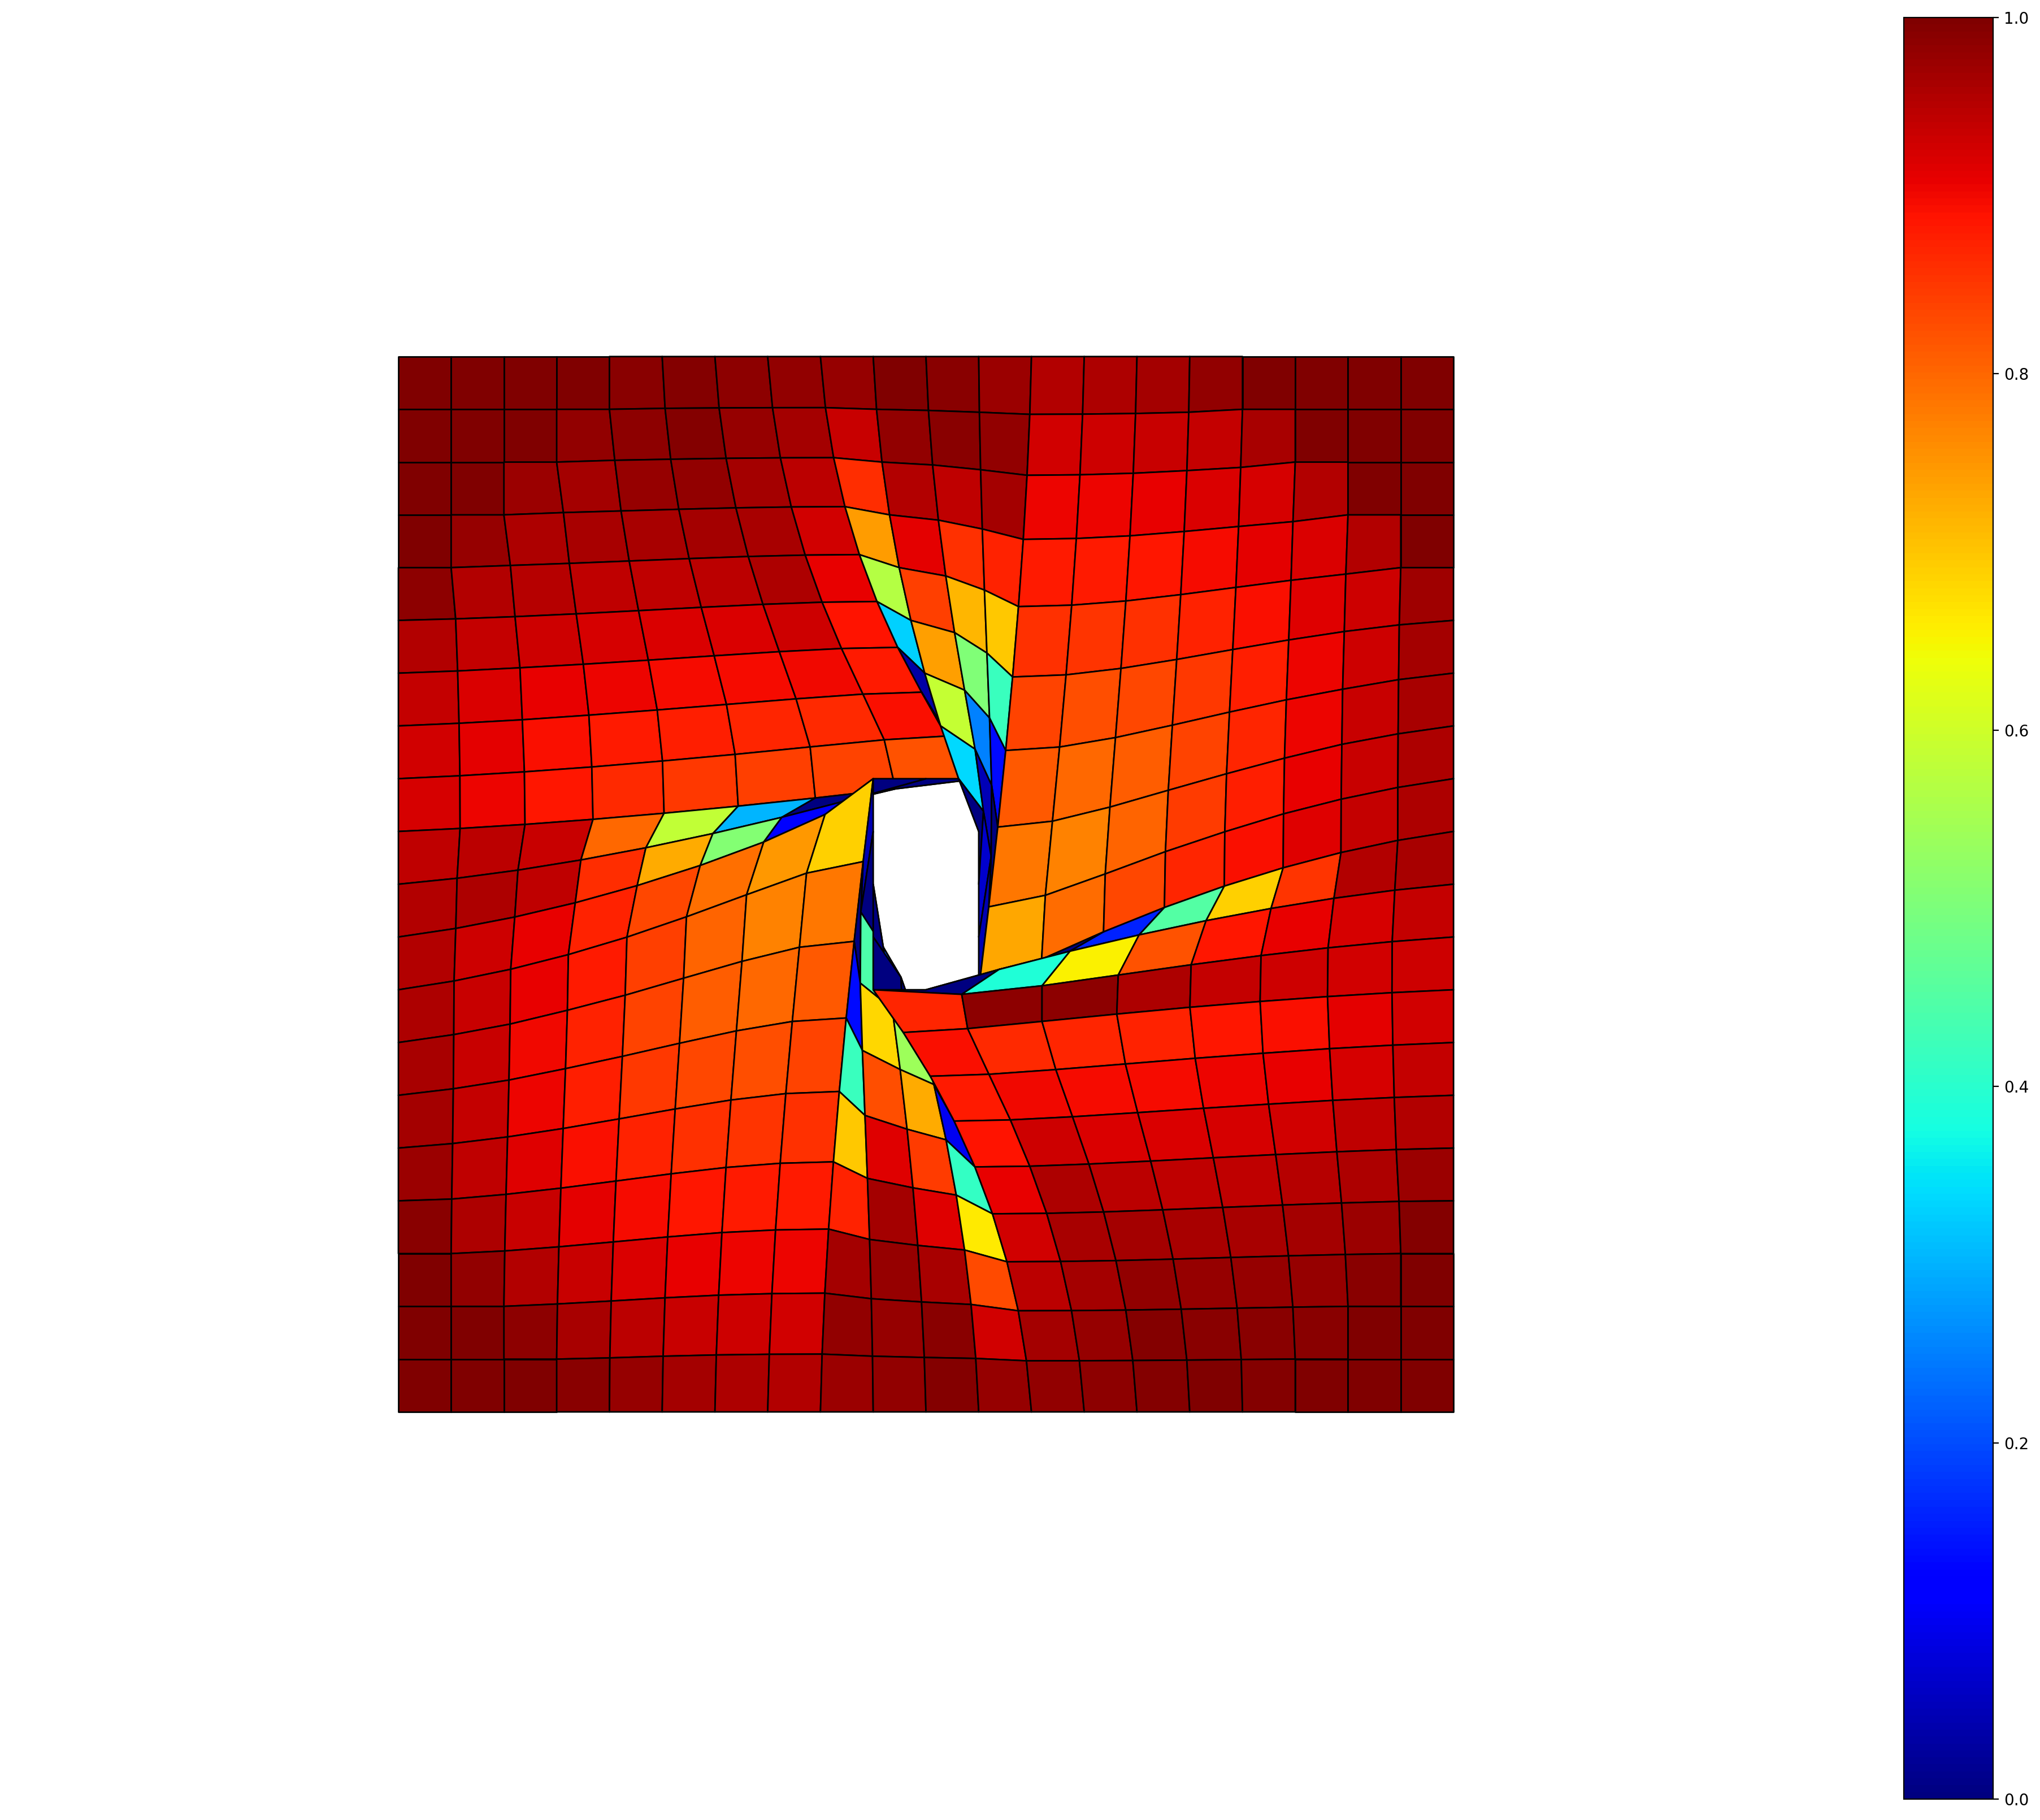

0
0.8389471678616465


In [63]:
new_mesh = DTRBF1_Mesh_Deform.deform(mesh, exterior, exterior_mapping)
new_mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)
print(min(new_mesh.qualities))
print(np.sum(new_mesh.qualities)/len(new_mesh.qualities))

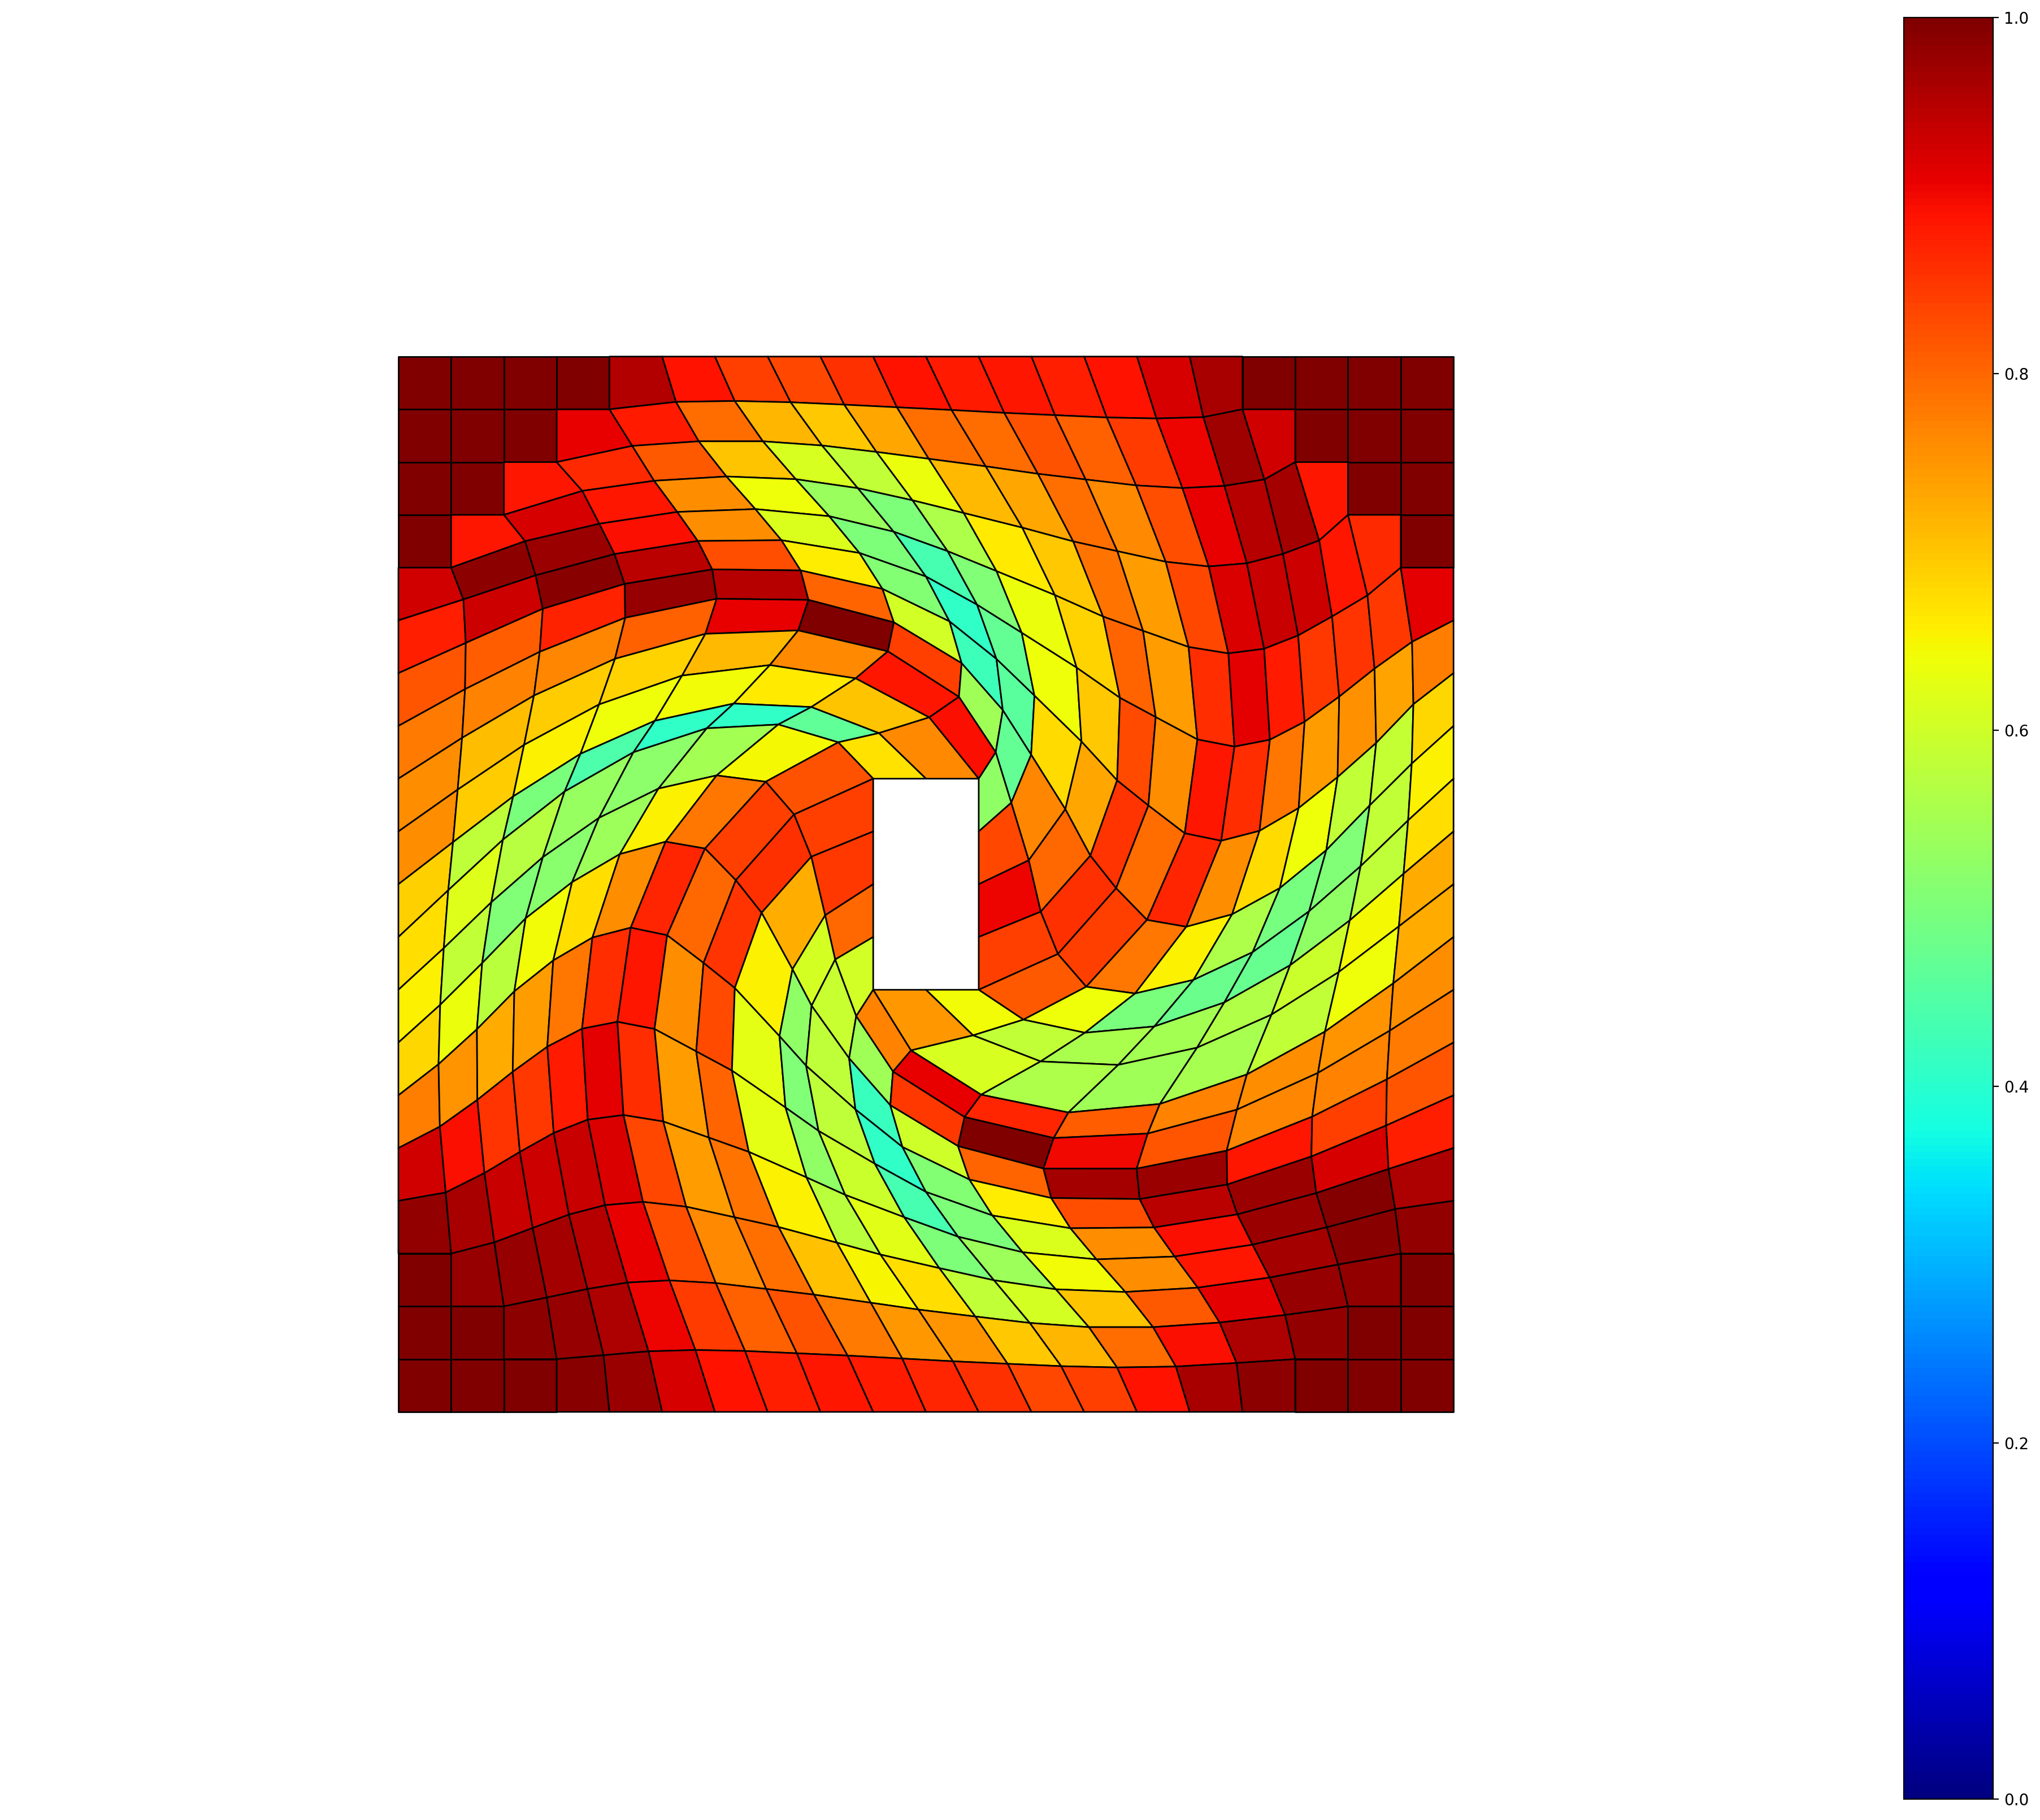

0.4075169464010197
0.7779464556329975


In [64]:
new_mesh = DTRBF1_Mesh_Deform.deform_rotation(mesh, exterior, rotation_mapping)
new_mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)
print(min(new_mesh.qualities))
print(np.sum(new_mesh.qualities)/len(new_mesh.qualities))

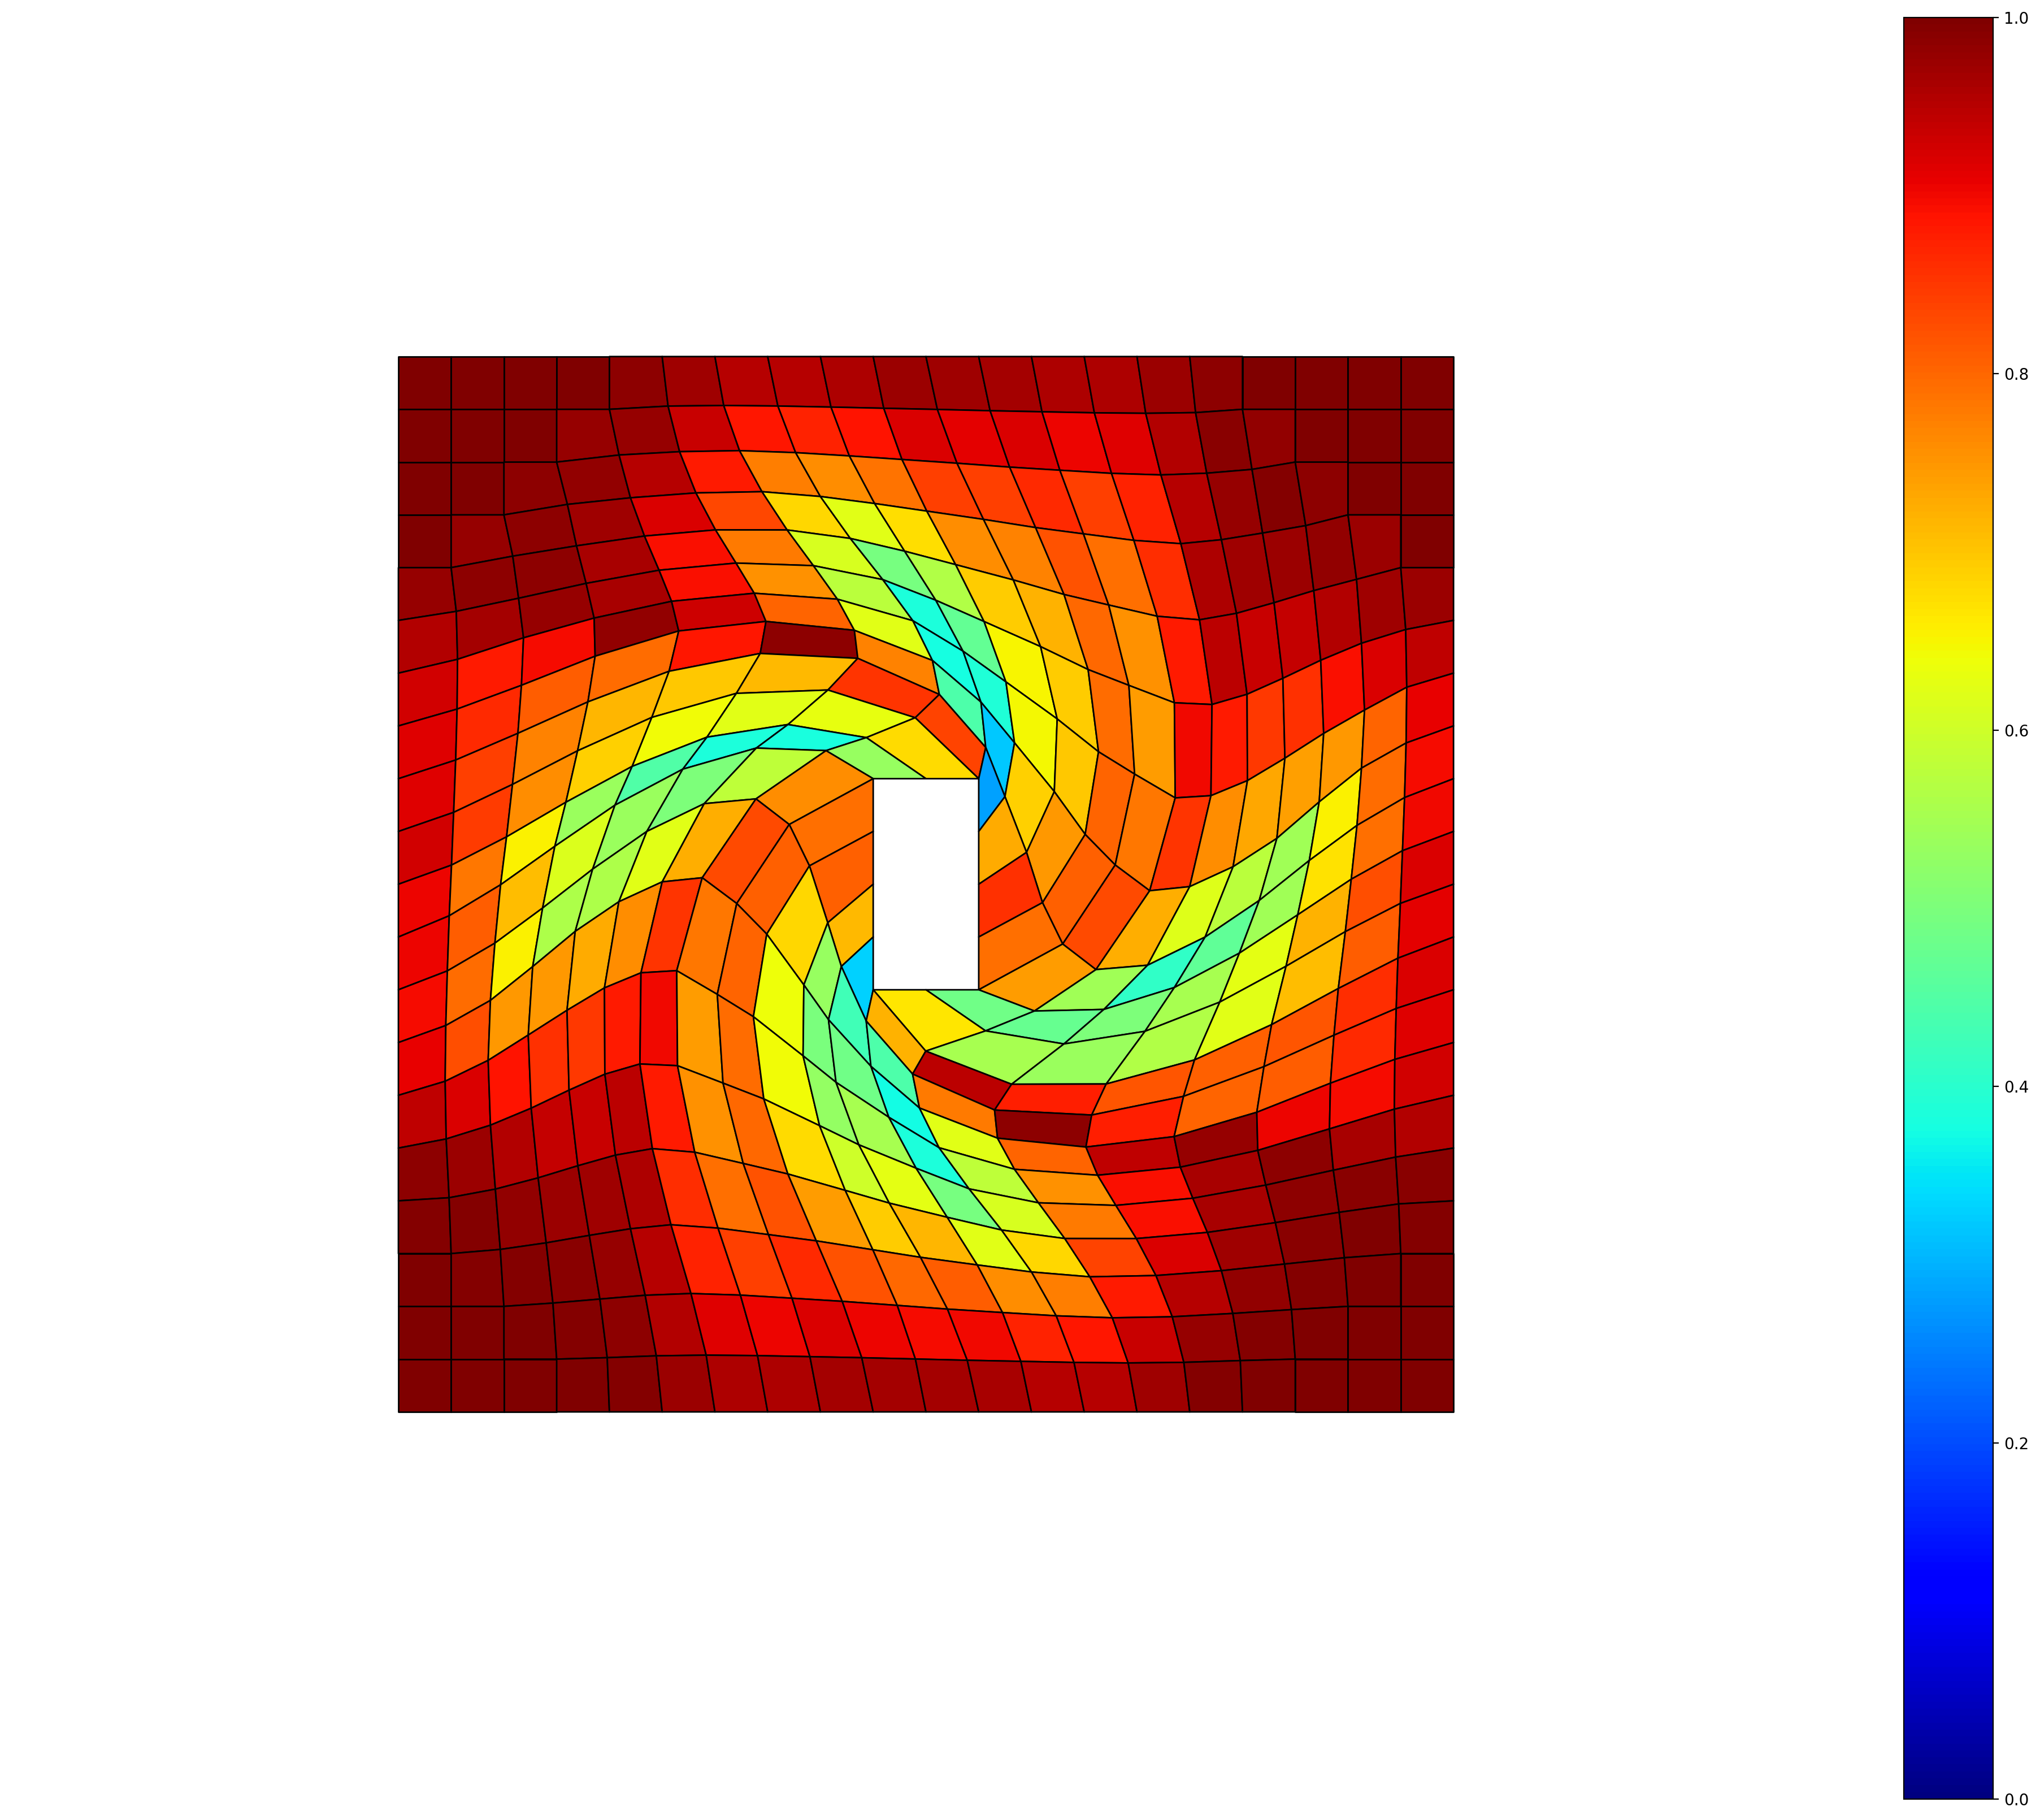

0.28157875430288776
0.8268191336681393


In [65]:
new_mesh = DTRBFAD_Mesh_Deform.deform_rotation(mesh, exterior, rotation_mapping)
new_mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)
print(min(new_mesh.qualities))
print(np.sum(new_mesh.qualities)/len(new_mesh.qualities))